# Test the trained model

## Hyperparameters

In [1]:
FILE_PATH = "data/shield/000001.jpg"
MODEL_PATH = "logs/20200531-170259"
TEMP_IMAGE_PATH = "tmp.jpeg"

## Load an image file

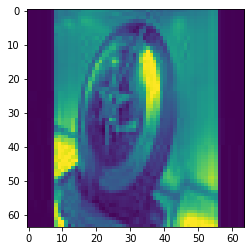

In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf

img = Image.open(FILE_PATH).convert("L")
img = img.resize((64, 64), Image.ANTIALIAS)
img.save(TEMP_IMAGE_PATH)

plt.imshow(img)
plt.show()

img_content = tf.io.read_file(TEMP_IMAGE_PATH)
decoded = tf.image.decode_jpeg(img_content, channels=1)
img_tensor = tf.image.convert_image_dtype(decoded, tf.float32)

os.remove(TEMP_IMAGE_PATH)

## Result

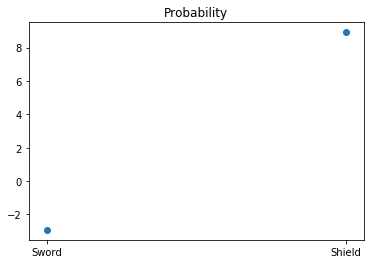

In [3]:
import numpy as np

model = tf.keras.models.load_model(MODEL_PATH)
ret = model(tf.reshape(img_tensor, [1, 64, 64, 1]))

ret_array = ret.numpy()[0]

plt.title("Probability")
plt.scatter(("Sword", "Shield"), ret_array)
plt.show()